<a href="https://colab.research.google.com/github/licTomasPerez/Spin-Chains-/blob/main/Heisenberg_Model_Wave_packet_Qutip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
a_list = [1,2,3]
b_list = []
c_list = []
for i in range(3):
  b_list.append(b)

for i in range(3):
  c_list.append(a_list[i]+b_list[i])
print(c_list)


[5, 6, 7]


In [65]:
N = 5
id2 = qeye(2)
sx = sigmax()
sy = sigmay()
sz = sigmaz()
    
sx_list = []
sy_list = []
sz_list = []
one_half_list = []
num_expression_sz = []
denom_expression_sz = []

for n in range(N):
    operator_list = []
    for m in range(N):
      operator_list.append(id2)
        
    operator_list[n] = sx
    sx_list.append(tensor(operator_list))
        
    operator_list[n] = sy
    sy_list.append(tensor(operator_list))
        
    operator_list[n] = sz
    sz_list.append(tensor(operator_list))
    
    
for n in range(N):
    one_half_list.append(0.5)
for n in range(N):
    num_expression_sz.append((sz_list[n] + one_half_list[n])*n)
    denom_expression_sz.append((sz_list[n] + one_half_list[n]))

sum_num_expression_sz = 0
for i in range(N):
  sum_num_expression_sz += num_expression_sz[n]
print(sum_num_expression_sz)

Quantum object: dims = [[2, 2, 2, 2, 2], [2, 2, 2, 2, 2]], shape = (32, 32), type = oper, isherm = True
Qobj data =
[[ 30.   0.   0. ...   0.   0.   0.]
 [  0. -10.   0. ...   0.   0.   0.]
 [  0.   0.  30. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... -10.   0.   0.]
 [  0.   0.   0. ...   0.  30.   0.]
 [  0.   0.   0. ...   0.   0. -10.]]


In [61]:
N = 5
id2 = qeye(2)
sx = sigmax()
sy = sigmay()
sz = sigmaz()
    
sx_list = []
sy_list = []
sz_list = []
one_half_list = []
num_expression_sz = []

for n in range(N):
    operator_list = []
    for m in range(N):
      operator_list.append(id2)
        
    operator_list[n] = sx
    sx_list.append(tensor(operator_list))
        
    operator_list[n] = sy
    sy_list.append(tensor(operator_list))
        
    operator_list[n] = sz
    sz_list.append(tensor(operator_list))
    
    
for n in range(N):
    one_half_list.append(0.5)
for n in range(N):
    num_expression_sz.append((sz_list[n] + one_half_list[n])*n)
print(num_expression_sz)

[Quantum object: dims = [[2, 2, 2, 2, 2], [2, 2, 2, 2, 2]], shape = (32, 32), type = oper, isherm = True
Qobj data =
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], Quantum object: dims = [[2, 2, 2, 2, 2], [2, 2, 2, 2, 2]], shape = (32, 32), type = oper, isherm = True
Qobj data =
[[ 1.5  0.   0.  ...  0.   0.   0. ]
 [ 0.   1.5  0.  ...  0.   0.   0. ]
 [ 0.   0.   1.5 ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ... -0.5  0.   0. ]
 [ 0.   0.   0.  ...  0.  -0.5  0. ]
 [ 0.   0.   0.  ...  0.   0.  -0.5]], Quantum object: dims = [[2, 2, 2, 2, 2], [2, 2, 2, 2, 2]], shape = (32, 32), type = oper, isherm = True
Qobj data =
[[ 3.  0.  0. ...  0.  0.  0.]
 [ 0.  3.  0. ...  0.  0.  0.]
 [ 0.  0.  3. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  0.  0.]
 [ 0.  0.  0. ...  0. -1.  0.]
 [ 0.  0.  0. ...  0.  0. -1.]], Quantum object: dims = [[2, 2, 2, 2, 2], [2, 2, 2, 2, 2]], shape = (32, 

## Heisenberg Model

The Heisenberg Hamiltonian is given by

$${{\hat {H}_H}=-{\frac {1}{2}}\sum _{j=1}^{N}(J_{x}\sigma _{j}^{x}\sigma _{j+1}^{x}+J_{y}\sigma _{j}^{y}\sigma _{j+1}^{y}+J_{z}\sigma _{j}^{z}\sigma _{j+1}^{z}+h\sigma _{j}^{z})}$$

where $J_{a}, a \in {x,y,z}$ are real-valued constants and where the Pauli operators follow the standard $SU(2)$ conmutation algebra: $$[\sigma^a_i, \sigma^b_j]=i \delta_{ij}\epsilon^{abc}\sigma^c$$


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

In [17]:
### XYZ Heisenberg model

solver = "me"   
N = 5            # número de spines

h  = 1.0 * 2 * np.pi * np.ones(N) 
Jz = 0.1 * 2 * np.pi * np.ones(N)
Jx = 0.15 * 2 * np.pi * np.ones(N)
Jy = 0.2 * 2 * np.pi * np.ones(N)

In [52]:
def hamiltonian(N, Jx, Jy, Jz, h, psi0, tlist, gamma, solver):
    
    id2 = qeye(2)
    sx = sigmax()
    sy = sigmay()
    sz = sigmaz()
    
    sx_list = []
    sy_list = []
    sz_list = []
    one_half_list = []
    num_expression_sz = []

    for n in range(N):
        operator_list = []
        for m in range(N):
            operator_list.append(id2)
        
        operator_list[n] = sx
        sx_list.append(tensor(operator_list))
        
        operator_list[n] = sy
        sy_list.append(tensor(operator_list))
        
        operator_list[n] = sz
        sz_list.append(tensor(operator_list))
    
    
    for n in range(N):
      one_half_list.append(0.5)
    for n in range(N):
      num_expression_sz[n] = (sz_list[n] + one_half_list[n])*n
      print(num_expression_sz[n])

    # Constructing the Hamiltonian
    
    H = 0
    
    for n in range(N):
        H += -0.5*h[n]*sz_list[n]
        
    for n in range(N-1):
        H += -0.5 * Jx[n] * sx_list[n] * sx_list[n+1]
        H += -0.5 * Jy[n] * sy_list[n] * sy_list[n+1]
        H += -0.5 * Jz[n] * sz_list[n] * sz_list[n+1]
    
    # collapse operators
    c_op_list = []

    # spin dephasing
    for n in range(N):
        if gamma[n] > 0.0:
            c_op_list.append(np.sqrt(gamma[n]) * sz_list[n])
    
    if solver == "me":
        result = mesolve(H, psi0, tlist, c_op_list, numerator)
    elif solver == "mc":
        ntraj = 200 
        result = mcsolve(H, psi0, tlist, c_op_list, numerator, ntraj)

    return result.expect



In [41]:
# dephasing rate
gamma = 5 * 10**-10 * np.ones(N)

# intial state, first spin in state |1>, the rest in state |0>
psi_list = []
psi_list.append(basis(2,1))
for n in range(N-1):
    psi_list.append(basis(2,0))
psi0 = tensor(psi_list)

tlist = np.linspace(0, 20, 200)

num_expt = hamiltonian(N, Jx, Jy, Jz, h, psi0, tlist, gamma, solver)


TypeError: ignored

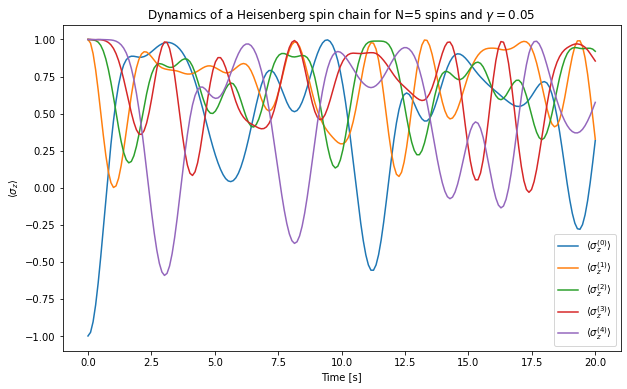

In [20]:
fig, ax = plt.subplots(figsize=(10,6))

for n in range(N):
    ax.plot(tlist, np.real(sz_expt[n]), label=r'$\langle\sigma_z^{(%d)}\rangle$'%n)

ax.legend(loc=0)
ax.set_xlabel(r'Time [s]')
ax.set_ylabel(r'$\langle\sigma_z\rangle$')
ax.set_title(r'Dynamics of a Heisenberg spin chain for N=5 spins and $\gamma = 0.05$');

In [13]:
from qutip.ipynbtools import version_table
version_table()

Software,Version
QuTiP,4.7.0
Numpy,1.21.6
SciPy,1.4.1
matplotlib,3.2.2
Cython,0.29.28
Number of CPUs,2
BLAS Info,OPENBLAS
IPython,5.5.0
Python,"3.7.13 (default, Mar 16 2022, 17:37:17) [GCC 7.5.0]"
OS,posix [linux]


In [28]:
def hamiltonian(N, Jx, Jy, Jz, h, psi0, tlist, gamma, solver):
    
    id2 = qeye(2)
    sx = sigmax()
    sy = sigmay()
    sz = sigmaz()
    
    sx_list = []
    sy_list = []
    sz_list = []
    
    for n in range(N):
        operator_list = []
        for m in range(N):
            operator_list.append(id2)
        
        operator_list[n] = sx
        sx_list.append(tensor(operator_list))
        
        operator_list[n] = sy
        sy_list.append(tensor(operator_list))
        
        operator_list[n] = sz
        sz_list.append(tensor(operator_list))
    
    # Constructing the Hamiltonian
    
    H = 0
    
    for n in range(N):
        H += -0.5*h[n]*sz_list[n]
        
    for n in range(N-1):
        H += -0.5 * Jx[n] * sx_list[n] * sx_list[n+1]
        H += -0.5 * Jy[n] * sy_list[n] * sy_list[n+1]
        H += -0.5 * Jz[n] * sz_list[n] * sz_list[n+1]
    
    # collapse operators
    c_op_list = []

    # spin dephasing
    for n in range(N):
        if gamma[n] > 0.0:
            c_op_list.append(np.sqrt(gamma[n]) * sz_list[n])
    
    if solver == "me":
        result = mesolve(H, psi0, tlist, c_op_list, sz_list)
    elif solver == "mc":
        ntraj = 200 
        result = mcsolve(H, psi0, tlist, c_op_list, sz_list, ntraj)

    return result.expect

In [29]:
# dephasing rate
gamma = 5 * 10**-10 * np.ones(N)

# intial state, first spin in state |1>, the rest in state |0>
psi_list = []
psi_list.append(basis(2,1))
for n in range(N-1):
    psi_list.append(basis(2,0))
psi0 = tensor(psi_list)

tlist = np.linspace(0, 20, 200)

sz_expt = hamiltonian(N, Jx, Jy, Jz, h, psi0, tlist, gamma, solver)


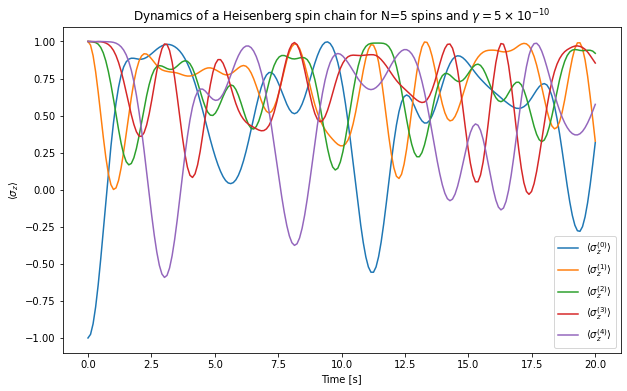

In [33]:
fig, ax = plt.subplots(figsize=(10,6))

for n in range(N):
    ax.plot(tlist, np.real(sz_expt[n]), label=r'$\langle\sigma_z^{(%d)}\rangle$'%n)

ax.legend(loc=0)
ax.set_xlabel(r'Time [s]')
ax.set_ylabel(r'$\langle\sigma_z\rangle$')
ax.set_title(r'Dynamics of a Heisenberg spin chain for N=5 spins and $\gamma = 5\times 10^{-10} $');